In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [11]:
# def read_dataset():
df = pd.read_csv('sonar.csv', header = None)
print(len(df.columns))
X = df[df.columns[0:60]].values
y = df[df.columns[60]]

61


In [12]:
X

array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]])

In [13]:
type(X)

numpy.ndarray

In [15]:
type(y)

pandas.core.series.Series

In [16]:
print(X.shape)
print(X.shape[1])
print(X.shape[0])

(208, 60)
60
208


In [17]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

In [18]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
type(y)

numpy.ndarray

In [20]:
n_labels = len(y)
n_unique_labels = len(np.unique(y))
one_hot_encode = np.zeros((n_labels, n_unique_labels))
one_hot_encode[np.arange(n_labels), y] = 1
Y = one_hot_encode

In [21]:
Y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [23]:
type(Y)

numpy.ndarray

In [24]:
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
normalized_features = (X - mu)/sigma

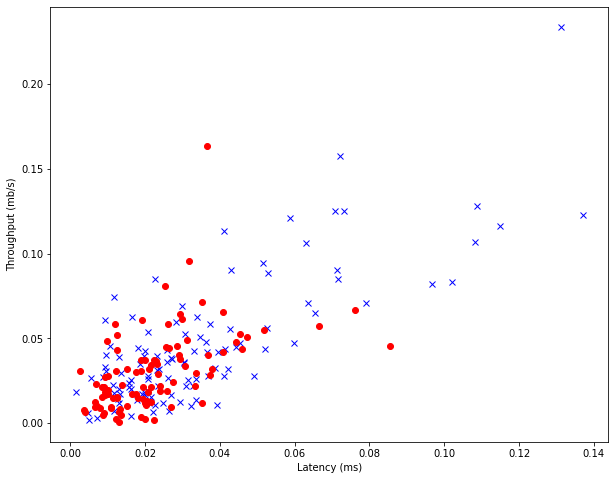

In [25]:
normal = np.where(y==0)
outliers = np.where(y==1)
fig = plt.figure(figsize=(10,8))
plt.plot(X[normal, 0], X[normal, 1], 'bx')
plt.plot(X[outliers, 0], X[outliers, 1], 'ro')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.show()

In [26]:
X,Y = shuffle(X,Y,random_state=1)
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.20, random_state=42)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(166, 60)
(166, 2)
(42, 60)
(42, 2)


In [27]:
learning_rate = 0.1
training_epochs = 1000
cost_history = np.empty(shape=[1], dtype=float)

n_dim = X.shape[1]
n_class = 2

In [29]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [30]:
x = tf.placeholder(tf.float32,[None,n_dim])
W = tf.Variable(tf.zeros([n_dim,n_class]))
b = tf.Variable(tf.zeros([n_class]))


In [32]:
b.shape

TensorShape([Dimension(2)])

In [33]:
init = tf.global_variables_initializer()

In [34]:
y_ = tf.placeholder(tf.float32, [None, n_class])
y = tf.nn.softmax(tf.matmul(x, W) + b)
cost_function = tf.reduce_mean(-tf.reduce_sum((y_ * tf.log(y)), reduction_indices=[1]))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [35]:
sess = tf.Session()
sess.run(init)
mse_history = []

In [44]:
for epoch in range( training_epochs):
    sess.run(training_step, feed_dict={x:train_x, y_:train_y})
    cost = sess.run(cost_function, feed_dict={x:train_x, y_:train_y})
    cost_history = np.append(cost_history, cost)
    pred_y = sess.run(y, feed_dict={x:test_x})
    print('epoch : ', epoch, ' - ', 'cost : ', cost)
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_history.append(sess.run(mse))

epoch :  0  -  cost :  0.41257823
epoch :  1  -  cost :  0.41252333
epoch :  2  -  cost :  0.41246846
epoch :  3  -  cost :  0.41241372
epoch :  4  -  cost :  0.41235903
epoch :  5  -  cost :  0.41230434
epoch :  6  -  cost :  0.41224977
epoch :  7  -  cost :  0.41219518
epoch :  8  -  cost :  0.41214082
epoch :  9  -  cost :  0.41208634
epoch :  10  -  cost :  0.41203204
epoch :  11  -  cost :  0.41197774
epoch :  12  -  cost :  0.41192356
epoch :  13  -  cost :  0.41186938
epoch :  14  -  cost :  0.4118153
epoch :  15  -  cost :  0.41176128
epoch :  16  -  cost :  0.41170728
epoch :  17  -  cost :  0.4116534
epoch :  18  -  cost :  0.4115995
epoch :  19  -  cost :  0.4115458
epoch :  20  -  cost :  0.41149208
epoch :  21  -  cost :  0.4114384
epoch :  22  -  cost :  0.41138476
epoch :  23  -  cost :  0.41133127
epoch :  24  -  cost :  0.41127786
epoch :  25  -  cost :  0.41122442
epoch :  26  -  cost :  0.41117105
epoch :  27  -  cost :  0.41111782
epoch :  28  -  cost :  0.41106457


epoch :  233  -  cost :  0.4012675
epoch :  234  -  cost :  0.40122443
epoch :  235  -  cost :  0.40118143
epoch :  236  -  cost :  0.4011384
epoch :  237  -  cost :  0.4010955
epoch :  238  -  cost :  0.40105253
epoch :  239  -  cost :  0.40100977
epoch :  240  -  cost :  0.4009669
epoch :  241  -  cost :  0.40092418
epoch :  242  -  cost :  0.40088144
epoch :  243  -  cost :  0.4008387
epoch :  244  -  cost :  0.40079615
epoch :  245  -  cost :  0.40075353
epoch :  246  -  cost :  0.40071088
epoch :  247  -  cost :  0.4006684
epoch :  248  -  cost :  0.40062585
epoch :  249  -  cost :  0.4005834
epoch :  250  -  cost :  0.40054095
epoch :  251  -  cost :  0.4004986
epoch :  252  -  cost :  0.40045622
epoch :  253  -  cost :  0.40041396
epoch :  254  -  cost :  0.40037164
epoch :  255  -  cost :  0.4003295
epoch :  256  -  cost :  0.4002872
epoch :  257  -  cost :  0.4002451
epoch :  258  -  cost :  0.40020302
epoch :  259  -  cost :  0.40016097
epoch :  260  -  cost :  0.40011895
epo

epoch :  464  -  cost :  0.39226195
epoch :  465  -  cost :  0.3922266
epoch :  466  -  cost :  0.3921913
epoch :  467  -  cost :  0.39215598
epoch :  468  -  cost :  0.39212063
epoch :  469  -  cost :  0.39208537
epoch :  470  -  cost :  0.39205015
epoch :  471  -  cost :  0.39201492
epoch :  472  -  cost :  0.39197972
epoch :  473  -  cost :  0.39194462
epoch :  474  -  cost :  0.39190954
epoch :  475  -  cost :  0.39187437
epoch :  476  -  cost :  0.39183936
epoch :  477  -  cost :  0.39180434
epoch :  478  -  cost :  0.39176932
epoch :  479  -  cost :  0.3917343
epoch :  480  -  cost :  0.3916993
epoch :  481  -  cost :  0.39166445
epoch :  482  -  cost :  0.39162943
epoch :  483  -  cost :  0.3915946
epoch :  484  -  cost :  0.39155975
epoch :  485  -  cost :  0.39152494
epoch :  486  -  cost :  0.39149016
epoch :  487  -  cost :  0.39145535
epoch :  488  -  cost :  0.39142057
epoch :  489  -  cost :  0.39138588
epoch :  490  -  cost :  0.39135116
epoch :  491  -  cost :  0.391316

epoch :  694  -  cost :  0.3847771
epoch :  695  -  cost :  0.38474715
epoch :  696  -  cost :  0.3847172
epoch :  697  -  cost :  0.38468727
epoch :  698  -  cost :  0.38465732
epoch :  699  -  cost :  0.38462743
epoch :  700  -  cost :  0.3845975
epoch :  701  -  cost :  0.38456768
epoch :  702  -  cost :  0.38453788
epoch :  703  -  cost :  0.384508
epoch :  704  -  cost :  0.3844782
epoch :  705  -  cost :  0.3844484
epoch :  706  -  cost :  0.38441864
epoch :  707  -  cost :  0.38438892
epoch :  708  -  cost :  0.38435918
epoch :  709  -  cost :  0.3843295
epoch :  710  -  cost :  0.38429978
epoch :  711  -  cost :  0.3842701
epoch :  712  -  cost :  0.3842405
epoch :  713  -  cost :  0.3842109
epoch :  714  -  cost :  0.38418132
epoch :  715  -  cost :  0.3841517
epoch :  716  -  cost :  0.38412216
epoch :  717  -  cost :  0.38409263
epoch :  718  -  cost :  0.38406307
epoch :  719  -  cost :  0.38403356
epoch :  720  -  cost :  0.3840041
epoch :  721  -  cost :  0.38397458
epoch

epoch :  924  -  cost :  0.3783608
epoch :  925  -  cost :  0.37833482
epoch :  926  -  cost :  0.37830886
epoch :  927  -  cost :  0.3782829
epoch :  928  -  cost :  0.37825698
epoch :  929  -  cost :  0.37823105
epoch :  930  -  cost :  0.37820515
epoch :  931  -  cost :  0.37817928
epoch :  932  -  cost :  0.3781534
epoch :  933  -  cost :  0.37812752
epoch :  934  -  cost :  0.37810165
epoch :  935  -  cost :  0.3780758
epoch :  936  -  cost :  0.37805
epoch :  937  -  cost :  0.37802425
epoch :  938  -  cost :  0.37799844
epoch :  939  -  cost :  0.3779727
epoch :  940  -  cost :  0.3779469
epoch :  941  -  cost :  0.37792116
epoch :  942  -  cost :  0.37789544
epoch :  943  -  cost :  0.37786973
epoch :  944  -  cost :  0.37784404
epoch :  945  -  cost :  0.37781835
epoch :  946  -  cost :  0.3777927
epoch :  947  -  cost :  0.377767
epoch :  948  -  cost :  0.37774143
epoch :  949  -  cost :  0.3777158
epoch :  950  -  cost :  0.3776901
epoch :  951  -  cost :  0.3776645
epoch :

MSE :  [0.2481358634233247, 0.2471237789640093, 0.24631368392889724, 0.2455365181224652, 0.24475776217796774, 0.2439765707634499, 0.24319808803961593, 0.2424268016149515, 0.2416655790171559, 0.24091598804993164, 0.24017874098223807, 0.23945404960735545, 0.23874182746811531, 0.23804183667731807, 0.2373537673226662, 0.23667724788631092, 0.23601192451494993, 0.23535742064996873, 0.23471337440727286, 0.23407944709943226, 0.23345529459399142, 0.2328406034358809, 0.232235064808598, 0.23163838689602098, 0.23105028806012137, 0.23047050686536188, 0.22989879060045415, 0.22933490105895254, 0.2287786002887317, 0.2282296712558803, 0.22768790936908173, 0.22715310777430034, 0.22662507890952607, 0.22610363931618652, 0.2255886159440235, 0.22507984092039962, 0.22457716096230348, 0.22408042090862276, 0.22358947035569304, 0.2231041722153809, 0.2226243999496249, 0.22215001295536108, 0.22168089856823872, 0.22121694064805558, 0.2207580205501299, 0.22030403084935354, 0.2198548725550472, 0.21941044309393112, 0

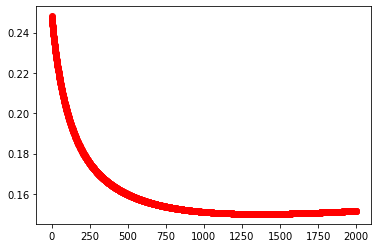

In [46]:
print("MSE : ", mse_history)
plt.plot(mse_history, 'ro-')
plt.show()

In [47]:
test_y

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [48]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_:test_y})))

Accuracy:  0.7380952


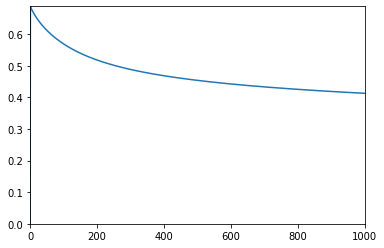

In [49]:
plt.plot(range(len(cost_history)), cost_history)
plt.axis([0, training_epochs, 0, np.max(cost_history)])
plt.show()

In [44]:
pred_y

array([[0.06778993, 0.9322101 ],
       [0.63951075, 0.36048928],
       [0.2605322 , 0.7394678 ],
       [0.19142108, 0.80857885],
       [0.68848985, 0.31151012],
       [0.09516971, 0.9048303 ],
       [0.9910108 , 0.00898918],
       [0.09973089, 0.90026903],
       [0.6808636 , 0.31913638],
       [0.512914  , 0.48708603],
       [0.97668034, 0.02331964],
       [0.5895445 , 0.4104555 ],
       [0.4783664 , 0.5216336 ],
       [0.8948265 , 0.10517353],
       [0.7461159 , 0.2538841 ],
       [0.24364954, 0.75635046],
       [0.5466063 , 0.4533938 ],
       [0.5096499 , 0.49035007],
       [0.6773989 , 0.3226011 ],
       [0.66458285, 0.33541715],
       [0.45032102, 0.54967904],
       [0.540045  , 0.459955  ],
       [0.20675981, 0.7932402 ],
       [0.45299944, 0.5470005 ],
       [0.50996804, 0.49003196],
       [0.9775479 , 0.02245217],
       [0.84863436, 0.15136568],
       [0.16863857, 0.8313614 ],
       [0.70883805, 0.2911619 ],
       [0.4308369 , 0.56916314],
       [0.

In [56]:
v = tf.cast(tf.argmax(pred_y, 1), tf.float32)

In [67]:
u = tf.cast(tf.argmax(test_y, 1), tf.float32)

In [68]:
with tf.Session() as sess:  print(v.eval()) 

[1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1.]


In [69]:
with tf.Session() as sess:  print(u.eval()) 

[1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1.]


In [55]:
test_y

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])